Input the libraries we need in this project:

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Read file:

In [4]:
# csv file read/load
data = pd.read_csv('AB_NYC_2019.csv')

To understanding what kind of and how much data we have:

In [5]:
# The field name of data
print("The field name of data: ", data.columns)

# Number of fields in data
print("Number of fields in data: ", len(data.columns))

# Number of data in data
print("Number of data in data: ", len(data))

The field name of data:  Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
Number of fields in data:  16
Number of data in data:  48895


In [6]:
# data output
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [7]:
# View information such as data field properties and count
# For find out how much of datas were null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
# Check the number of nulls in each field
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

I check some datas which were null in last_review and reviews_per_month, and in some of them, the number_of_reviews was 0. So it's obvious that when number_of_reviews was 0 these two columns will be zero. therefore I will put zero on null column. 

In [9]:
data.loc[data.number_of_reviews==0, 'reviews_per_month'] = 0
data.loc[data.number_of_reviews==0, 'last_review'] = 0

In [10]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2


Without name and host_name data will be useless so remove them

In [11]:
# Removing null values in name and host_name fields
data = data[pd.notnull(data['name'])]
data = data[pd.notnull(data['host_name'])]

So now we check how much datas were null

In [12]:
# Recheck the number of nulls in each field
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

As you see we don't have anyn null data.
For next step I gonna findout we have any outliers or not. So we're gonna sort data.

In [18]:
data.sort_values(by=['latitude'])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
14119,10830083,Beautiful well kept private home!,56078939,Tony,Staten Island,Tottenville,40.49979,-74.24084,Private room,110,2,0,0,0.00,1,364
46919,35489384,Cozy Apartment,236186921,Iveth,Staten Island,Tottenville,40.50641,-74.23059,Entire home/apt,75,1,1,2019-06-28,1.00,1,299
15278,12230928,Villa DiGioia visit NYC via SI,65806798,Michael J,Staten Island,Tottenville,40.50708,-74.24285,Private room,100,2,0,0,0.00,1,365
1424,639199,"Beautiful 4BR/4BA Home, Staten Island, NY City.",1483081,Marina,Staten Island,Tottenville,40.50868,-74.23986,Entire home/apt,299,3,59,2019-07-08,0.82,1,245
23460,18997371,Cozy Getaway,90104417,Sueann,Staten Island,Tottenville,40.50873,-74.23914,Entire home/apt,85,2,49,2019-07-01,2.08,2,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3349,2008227,Private Studio in Private Home,9539641,Dianne,Bronx,North Riverdale,40.90804,-73.90005,Private room,53,2,143,2019-06-30,2.13,1,263
48033,36041232,Nice house room 2 near van cortlandt park,230720704,Pp,Bronx,North Riverdale,40.91167,-73.89566,Private room,40,1,1,2019-07-06,1.00,3,174
23011,18635370,Fantastic Sunny peaceful room in Riverdale,91385196,Vicdania,Bronx,North Riverdale,40.91169,-73.90564,Private room,50,365,0,0,0.00,1,363
47790,35916310,Nice house private room,230720704,Pp,Bronx,North Riverdale,40.91234,-73.89417,Private room,40,1,1,2019-06-30,1.00,3,179


so as you see latitude datas very close so we don't have any outliers on it. 

In [19]:
data.sort_values(by=['longitude'])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
45652,34888503,Charming town of Tottenville right outside NYC,962249,Dora,Staten Island,Tottenville,40.50943,-74.24442,Entire home/apt,70,3,1,2019-07-01,1.00,1,128
15278,12230928,Villa DiGioia visit NYC via SI,65806798,Michael J,Staten Island,Tottenville,40.50708,-74.24285,Private room,100,2,0,0,0.00,1,365
14119,10830083,Beautiful well kept private home!,56078939,Tony,Staten Island,Tottenville,40.49979,-74.24084,Private room,110,2,0,0,0.00,1,364
1424,639199,"Beautiful 4BR/4BA Home, Staten Island, NY City.",1483081,Marina,Staten Island,Tottenville,40.50868,-74.23986,Entire home/apt,299,3,59,2019-07-08,0.82,1,245
23460,18997371,Cozy Getaway,90104417,Sueann,Staten Island,Tottenville,40.50873,-74.23914,Entire home/apt,85,2,49,2019-07-01,2.08,2,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38562,30325639,Cozy shared studio in a safe neighborhood,21495656,Ramy,Queens,Little Neck,40.76212,-73.71928,Shared room,32,3,1,2018-12-04,0.14,1,88
45592,34844239,❀ Bright and cozy townhouse | Ideal for famili...,154268909,Malik,Queens,Bellerose,40.74027,-73.71829,Entire home/apt,180,2,0,0,0.00,2,281
11610,9031216,"upstairs apartment private, spacious",47140247,Hilary,Queens,Bellerose,40.72756,-73.71795,Entire home/apt,42,3,0,0,0.00,1,0
47208,35638944,☀Bright & sunny townhouse | Perfect for famili...,154268909,Malik,Queens,Bellerose,40.74006,-73.71690,Entire home/apt,240,2,0,0,0.00,2,159


longitude osn't have any outliers too.

In [20]:
data.sort_values(by=['price'])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
26866,21304320,Best Coliving space ever! Shared room.,101970559,Sergii,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,2019-05-24,0.26,6,139
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0


but we have big interval. So I'm curios to see what is the mean of these datas.

In [21]:
np.mean(data.price)

np.float64(152.74030864955586)

So the price is not too big and maybe the datas that have big price is outliers. I'm gonna findout is really big price is outliers or not so I draw a chart only for price. 

(array([3.908e+04, 7.791e+03, 1.128e+03, 3.850e+02, 1.760e+02, 9.100e+01,
        3.400e+01, 3.700e+01, 1.700e+01, 9.000e+00, 2.700e+01, 5.000e+00,
        1.400e+01, 4.000e+00, 7.000e+00, 8.000e+00, 2.000e+00, 2.000e+00,
        4.000e+00, 2.000e+00, 5.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 7.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 6.000e+00]),
 array([    0.,   200.,   400.,   600.,   800.,  1000.,  1200.,  1400.,
         1600.,  1800.,  2000.,  2200.,  2400.,  2600.,  2800.,  3000.,
         3200.,  3400.,  3600.,  3800.,  4000.,  4200.,  4400.,  4600.,
         4800.,  5000.,  5200.,  5400.,  5600.,  5800.,  6000.,  6200.,
         6400.,  6600.,  6800.,  7000.,  7200.,  7400.,  7600.,  7800.,
         8000., 

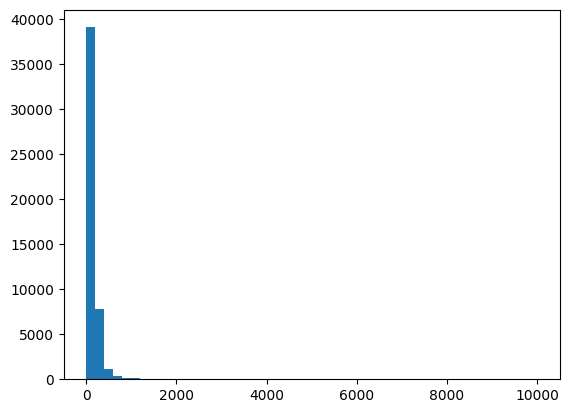

In [13]:
import matplotlib.pyplot as plt

plt.hist(data.price, bins=50)

So as you see more than 2000. maybe will be outliers. therefore I'm gonna check how musch datas more than 2000.

In [14]:
len(data[data.price > 2000])

86

In 48858 datas we have only 86 datas more than 2000. So I think, it's obvious that these data were outliers. So I remove them and after that I will plot again to findout the exact price were begining outliers datas.

In [24]:
data = data[data.price < 2000]

(array([2.0400e+03, 1.3772e+04, 1.0591e+04, 8.0660e+03, 4.6110e+03,
        3.1440e+03, 2.1220e+03, 1.3100e+03, 7.8400e+02, 4.3100e+02,
        3.6400e+02, 2.5800e+02, 3.3400e+02, 9.8000e+01, 7.4000e+01,
        9.3000e+01, 8.5000e+01, 1.0500e+02, 6.8000e+01, 3.4000e+01,
        6.1000e+01, 2.6000e+01, 3.5000e+01, 2.2000e+01, 3.2000e+01,
        6.1000e+01, 7.0000e+00, 1.6000e+01, 3.0000e+00, 4.0000e+00,
        1.5000e+01, 6.0000e+00, 8.0000e+00, 3.0000e+00, 2.0000e+00,
        2.0000e+00, 2.0000e+00, 3.0000e+01, 1.0000e+00, 2.0000e+00,
        4.0000e+00, 0.0000e+00, 5.0000e+00, 5.0000e+00, 3.0000e+00,
        2.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 4.0000e+00]),
 array([   0.  ,   39.98,   79.96,  119.94,  159.92,  199.9 ,  239.88,
         279.86,  319.84,  359.82,  399.8 ,  439.78,  479.76,  519.74,
         559.72,  599.7 ,  639.68,  679.66,  719.64,  759.62,  799.6 ,
         839.58,  879.56,  919.54,  959.52,  999.5 , 1039.48, 1079.46,
        1119.44, 1159.42, 1199.4 ,

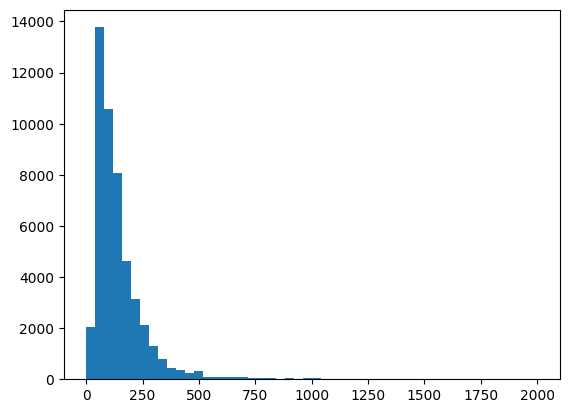

In [25]:
plt.hist(data.price, bins=50)

In [19]:
len(data[data.price > 1000])

129

So more than 1000 is outliers and I gonna delete them

In [20]:
data = data[data.price <= 1000]

(array([5.400e+01, 1.986e+03, 6.555e+03, 7.217e+03, 6.049e+03, 4.542e+03,
        4.105e+03, 3.961e+03, 2.437e+03, 2.174e+03, 1.945e+03, 1.199e+03,
        1.541e+03, 5.810e+02, 5.970e+02, 7.130e+02, 2.590e+02, 5.250e+02,
        1.830e+02, 2.480e+02, 2.690e+02, 9.500e+01, 1.970e+02, 6.100e+01,
        1.300e+02, 2.040e+02, 3.200e+01, 6.600e+01, 2.200e+01, 5.200e+01,
        8.600e+01, 7.000e+00, 6.800e+01, 1.700e+01, 4.500e+01, 6.000e+01,
        1.200e+01, 5.600e+01, 3.000e+00, 3.100e+01, 5.600e+01, 5.000e+00,
        2.300e+01, 3.000e+00, 1.400e+01, 2.100e+01, 3.000e+00, 1.900e+01,
        5.000e+00, 8.600e+01]),
 array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,
         180.,  200.,  220.,  240.,  260.,  280.,  300.,  320.,  340.,
         360.,  380.,  400.,  420.,  440.,  460.,  480.,  500.,  520.,
         540.,  560.,  580.,  600.,  620.,  640.,  660.,  680.,  700.,
         720.,  740.,  760.,  780.,  800.,  820.,  840.,  860.,  880.,
         900.,  920.,

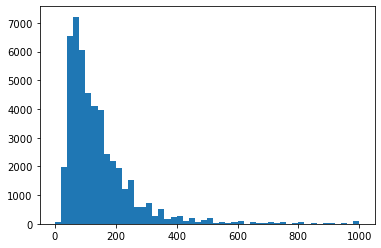

In [21]:
plt.hist(data.price, bins=50)

Now we can see we have compact data in price. So go to sort another column to findout the outliers if it has.

In [22]:
data.sort_values(by=['minimum_nights'])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
11752,9137941,1 BR UES Apartment,4223044,Alexandra,Manhattan,Upper East Side,40.77012,-73.95777,Entire home/apt,200,1,0,0,0.00,1,0
32281,25257443,Cozy Parkside Studio in the ❤️ of the East Vil...,190823422,Kimberley,Manhattan,East Village,40.72469,-73.97892,Entire home/apt,165,1,67,2019-07-01,5.51,1,38
11755,9140055,Room and Breakfast - Room 1,35322092,Rhemy,Brooklyn,Bedford-Stuyvesant,40.68523,-73.92926,Private room,49,1,136,2019-07-07,3.05,3,200
11757,9145070,Great Deal! Steps to Central Park,3025128,David,Manhattan,Upper West Side,40.77942,-73.97627,Entire home/apt,180,1,43,2016-08-27,0.98,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47620,35834935,Williamsburg Apartment,82674375,Meg,Brooklyn,Williamsburg,40.70898,-73.94885,Entire home/apt,140,500,0,0,0.00,1,331
13404,10053943,Historic Designer 2 Bed. Apartment,2697686,Glenn H.,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,2018-01-04,0.07,1,42
26341,20990053,Beautiful place in Brooklyn! #2,151084261,Angie,Brooklyn,Williamsburg,40.71772,-73.95059,Private room,79,999,24,2018-06-28,1.12,6,249
38664,30378211,Shared Studio (females only),200401254,Meg,Manhattan,Greenwich Village,40.73094,-73.99900,Shared room,110,999,0,0,0.00,1,365


Maybe we have outliers. Let's check it.

(array([4.3592e+04, 4.5960e+03, 1.3400e+02, 1.3300e+02, 3.3000e+01,
        9.0000e+00, 4.0000e+00, 5.3000e+01, 4.0000e+00, 4.0000e+00,
        4.0000e+00, 7.0000e+00, 0.0000e+00, 0.0000e+00, 3.5000e+01,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 2.59800e+01, 5.09600e+01, 7.59400e+01, 1.00920e+02,
        1.25900e+02, 1.50880e+02, 1.75860e+02, 2.00840e+02, 2.25820e+02,
        2.50800e+02, 2.75780e+02, 3.00760e+02, 3.25740e+02, 3.50720e+02,
        3.75700e+02, 4.00680e+02, 4.25660e+02, 4.50640e+02, 4.75620e+02,
        5.00600e+02, 5.255

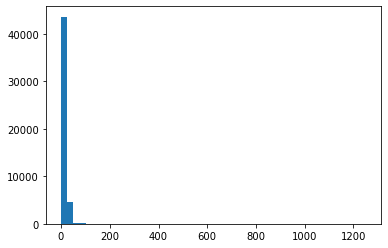

In [23]:
plt.hist(data.minimum_nights, bins=50)

In [24]:
len(data[data.minimum_nights > 200])

65

Obviously more than 200 nigths is outliers.

In [25]:
data = data[data.minimum_nights < 200]

(array([3.5533e+04, 5.9480e+03, 6.8300e+02, 9.1100e+02, 2.7200e+02,
        1.6300e+02, 3.1800e+02, 4.2780e+03, 1.8000e+01, 1.3000e+01,
        4.0000e+00, 3.4000e+01, 1.3000e+01, 8.0000e+00, 1.0900e+02,
        3.0000e+00, 1.0000e+00, 8.0000e+00, 5.0000e+00, 0.0000e+00,
        8.0000e+00, 2.0000e+00, 1.0600e+02, 2.0000e+00, 2.0000e+00,
        1.3000e+01, 2.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00,
        2.6000e+01, 0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 6.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        4.4000e+01, 4.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1.  ,   4.94,   8.88,  12.82,  16.76,  20.7 ,  24.64,  28.58,
         32.52,  36.46,  40.4 ,  44.34,  48.28,  52.22,  56.16,  60.1 ,
         64.04,  67.98,  71.92,  75.86,  79.8 ,  83.74,  87.68,  91.62,
         95.56,  99.5 , 103.44, 107.38, 111.32, 115.26, 119.2 , 123.14,
        127.08, 131.02, 134.96

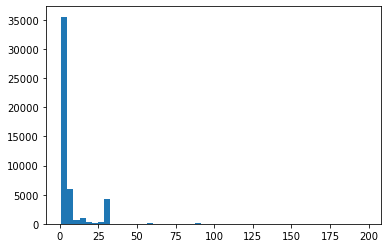

In [26]:
plt.hist(data.minimum_nights, bins=50)

In [27]:
len(data[data.minimum_nights > 100])

95

We save more than 100 nights because it's not outliers anymore. check other column. 

In [28]:
data.sort_values(by=['number_of_reviews'])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,0,0.00,1,23
40761,31650146,Gorgeous Spacious 1BR in Prime Lower East Side,1306854,Ani,Manhattan,Lower East Side,40.71991,-73.98505,Entire home/apt,110,30,0,0,0.00,1,172
40760,31649210,one bedroom,111586798,Percival,Bronx,Soundview,40.82121,-73.87764,Private room,65,7,0,0,0.00,1,90
40758,31647962,Spacious and stylish Harlem apartment,237280886,Nicola,Manhattan,Harlem,40.82636,-73.94985,Entire home/apt,95,2,0,0,0.00,1,0
13619,10192898,"Heart of West Village, over NYE!",7108710,Katie,Manhattan,West Village,40.73440,-74.00262,Private room,105,1,0,0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293


(array([3.1499e+04, 5.4690e+03, 2.7120e+03, 1.9280e+03, 1.3600e+03,
        1.1180e+03, 8.4900e+02, 6.2700e+02, 5.3000e+02, 4.3600e+02,
        3.9500e+02, 2.8600e+02, 2.3800e+02, 1.9100e+02, 1.5400e+02,
        1.3400e+02, 1.3300e+02, 9.5000e+01, 8.5000e+01, 5.2000e+01,
        4.4000e+01, 3.7000e+01, 2.7000e+01, 2.0000e+01, 1.3000e+01,
        2.6000e+01, 1.3000e+01, 1.0000e+01, 1.1000e+01, 7.0000e+00,
        6.0000e+00, 8.0000e+00, 8.0000e+00, 4.0000e+00, 5.0000e+00,
        4.0000e+00, 3.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  0.  ,  12.58,  25.16,  37.74,  50.32,  62.9 ,  75.48,  88.06,
        100.64, 113.22, 125.8 , 138.38, 150.96, 163.54, 176.12, 188.7 ,
        201.28, 213.86, 226.44, 239.02, 251.6 , 264.18, 276.76, 289.34,
        301.92, 314.5 , 327.08, 339.66, 352.24, 364.82, 377.4 , 389.98,
        402.56, 415.14, 427.72

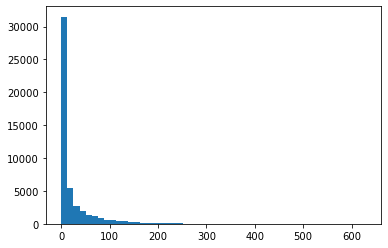

In [29]:
plt.hist(data.number_of_reviews, bins=50)

In [30]:
len(data[data.number_of_reviews > 300])

131

In [31]:
len(data[data.number_of_reviews > 400])

39

more than 400 were outliers.

In [32]:
data = data[data.number_of_reviews <= 400]

We ignore reviews_per_month because many of them put by myself. 

In [33]:
data.sort_values(by=['calculated_host_listings_count'])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
24487,19701453,"GardenViewApt 10min to Bushwick ArtScene,Food,...",5413500,Rebecca,Queens,Ridgewood,40.70499,-73.91304,Entire home/apt,95,3,0,0,0.00,1,0
28008,21885860,HUGE Bedroom in Brooklyn Off Lorimer J/M/Z & L,3105557,Joshua,Brooklyn,Williamsburg,40.70383,-73.94431,Private room,43,2,6,2018-01-02,0.31,1,0
28009,21885914,Gorgeous 1 BR in heart of Prospect Heights!,7683267,Nicholas,Brooklyn,Prospect Heights,40.67933,-73.96912,Entire home/apt,100,1,61,2019-06-29,3.23,1,0
28011,21890848,Beautiful Healthy Home in Ditmas Park,21003445,Vanessa,Brooklyn,Flatbush,40.63531,-73.96546,Private room,55,2,3,2018-04-30,0.16,1,65
28012,21891406,Bright studio size room in the East Village,42954481,Cindy,Manhattan,East Village,40.72801,-73.98736,Private room,95,1,3,2018-10-29,0.16,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41440,32239034,Sonder | Stock Exchange | Quaint Studio + Lounge,219517861,Sonder (NYC),Manhattan,Financial District,40.70651,-74.01252,Entire home/apt,203,2,9,2019-06-20,2.16,327,336
41439,32239033,Sonder | Stock Exchange | Smart 1BR + Kitchen,219517861,Sonder (NYC),Manhattan,Financial District,40.70583,-74.01089,Entire home/apt,221,2,4,2019-06-24,1.97,327,333
41437,32238821,Sonder | Stock Exchange | Unique 1BR + Laundry,219517861,Sonder (NYC),Manhattan,Financial District,40.70731,-74.01021,Entire home/apt,242,2,15,2019-06-16,3.75,327,261
41435,32238730,Sonder | Stock Exchange | Original 3BR + Lounge,219517861,Sonder (NYC),Manhattan,Financial District,40.70785,-74.01239,Entire home/apt,505,2,7,2019-06-14,1.79,327,275


(array([4.4709e+04, 1.3280e+03, 2.7100e+02, 1.9300e+02, 3.0800e+02,
        1.4400e+02, 4.3000e+01, 2.9900e+02, 0.0000e+00, 6.5000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.7800e+02, 1.9200e+02,
        1.0300e+02, 0.0000e+00, 0.0000e+00, 1.1900e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.3200e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.2700e+02]),
 array([  1.  ,   7.52,  14.04,  20.56,  27.08,  33.6 ,  40.12,  46.64,
         53.16,  59.68,  66.2 ,  72.72,  79.24,  85.76,  92.28,  98.8 ,
        105.32, 111.84, 118.36, 124.88, 131.4 , 137.92, 144.44, 150.96,
        157.48, 164.  , 170.52, 177.04, 183.56, 190.08, 196.6 , 203.12,
        209.64, 216.16, 222.68

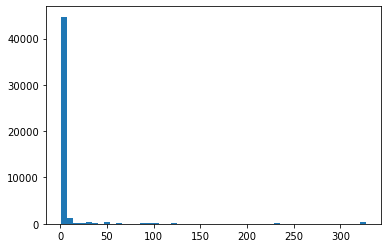

In [34]:
plt.hist(data.calculated_host_listings_count, bins=50)

In this case we don't have any outliers because even in more than 300 we have some datas that were shown in this plot.

In [35]:
data.sort_values(by=['availability_365'])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
24487,19701453,"GardenViewApt 10min to Bushwick ArtScene,Food,...",5413500,Rebecca,Queens,Ridgewood,40.70499,-73.91304,Entire home/apt,95,3,0,0,0.00,1,0
28799,22238046,Bronx 167th Grand ConCourse,162457374,Daniel,Bronx,Concourse Village,40.83314,-73.91708,Private room,38,2,0,0,0.00,1,0
14162,10887852,Cozy Hell's Kitchen Apt,39754804,Karen,Manhattan,Hell's Kitchen,40.76438,-73.99482,Entire home/apt,125,1,64,2019-06-22,1.88,1,0
14161,10887262,Kid's friendly two levels apartment with a yard,4343152,Anna,Manhattan,Harlem,40.81223,-73.94313,Entire home/apt,199,4,2,2016-10-11,0.05,1,0
28800,22241250,Newly renovated 1br in the heart of NY,4148879,Carlos,Manhattan,Flatiron District,40.74212,-73.99042,Entire home/apt,249,4,3,2019-05-22,0.16,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37380,29674137,SOUTH RIVER VIEWS/DOORMAN-E 52nd ST,2856748,Ruchi,Manhattan,Midtown,40.75565,-73.96340,Entire home/apt,330,30,0,0,0.00,49,365
4892,3499016,House 1 Bed $100/ night per person,17618198,Edvaldo,Queens,Ditmars Steinway,40.77902,-73.90768,Private room,100,2,2,2014-09-22,0.03,1,365
37389,29676417,New York Moments (Ladies Only),223248121,Julia,Manhattan,Kips Bay,40.74319,-73.98074,Shared room,39,2,1,2019-01-01,0.16,1,365
4874,3479019,Lovely and quiet Brownstone!!!!,17299359,Lionel,Brooklyn,Bedford-Stuyvesant,40.68448,-73.95854,Entire home/apt,175,3,4,2014-11-02,0.07,2,365


(array([19445.,  1269.,   959.,   906.,   894.,   714.,   696.,   615.,
          612.,   657.,   685.,   804.,  1018.,   430.,   282.,   285.,
          331.,   438.,   328.,   317.,   386.,   565.,   400.,   528.,
          822.,   552.,   303.,   257.,   268.,   290.,   386.,   288.,
          327.,   432.,   475.,   352.,   490.,   350.,   549.,   329.,
          447.,   413.,   703.,   584.,   629.,   776.,  1041.,   625.,
          637.,  2622.]),
 array([  0. ,   7.3,  14.6,  21.9,  29.2,  36.5,  43.8,  51.1,  58.4,
         65.7,  73. ,  80.3,  87.6,  94.9, 102.2, 109.5, 116.8, 124.1,
        131.4, 138.7, 146. , 153.3, 160.6, 167.9, 175.2, 182.5, 189.8,
        197.1, 204.4, 211.7, 219. , 226.3, 233.6, 240.9, 248.2, 255.5,
        262.8, 270.1, 277.4, 284.7, 292. , 299.3, 306.6, 313.9, 321.2,
        328.5, 335.8, 343.1, 350.4, 357.7, 365. ]),
 <a list of 50 Patch objects>)

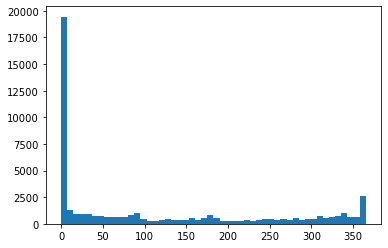

In [36]:
plt.hist(data.availability_365, bins=50)

This is completely compact data and it's very good feature to predict datas.

In [37]:
len(data)

48511

**So now I have 48511 compact data that I can ask question and answer by these datas.**

1. Which neighborhood has the most hosts?

In [38]:
a=data.groupby(by=['neighbourhood']).neighbourhood.count()
a = a.sort_values(ascending=False)
print(a)

neighbourhood
Williamsburg          3904
Bedford-Stuyvesant    3700
Harlem                2642
Bushwick              2457
Hell's Kitchen        1944
                      ... 
Willowbrook              1
Richmondtown             1
New Dorp                 1
Woodrow                  1
Fort Wadsworth           1
Name: neighbourhood, Length: 221, dtype: int64


2. Which neighborhood has the most expensive?

In [39]:
a=data.groupby(by=['neighbourhood']).price.mean()
a = a.sort_values(ascending=False)
print(a)

neighbourhood
Fort Wadsworth       800.000000
Woodrow              700.000000
Tribeca              328.902439
NoHo                 276.246753
Flatiron District    275.052632
                        ...    
New Dorp              57.000000
Soundview             53.466667
Tremont               51.545455
Hunts Point           50.500000
Bull's Head           47.333333
Name: price, Length: 221, dtype: float64


3. Which room_type Airbnb has?

In [40]:
a=data.groupby(by=['room_type']).room_type.count()
a = a.sort_values(ascending=False)
print(a)

room_type
Entire home/apt    25146
Private room       22210
Shared room         1155
Name: room_type, dtype: int64


4. Which room_type have more reviews?

In [41]:
a=data.groupby(by=['room_type']).number_of_reviews.sum()
a = a.sort_values(ascending=False)
print(a)

room_type
Entire home/apt    573610
Private room       524009
Shared room         18796
Name: number_of_reviews, dtype: int64


5. Which hosts has more cabin?

In [42]:
a=data.groupby(by=['host_name']).host_name.count()
a = a.sort_values(ascending=False)
print(a)

host_name
Michael           413
David             397
Sonder (NYC)      327
John              292
Alex              278
                 ... 
Mariia              1
Marilee & Gene      1
Marilena            1
Marilynn            1
'Cil                1
Name: host_name, Length: 11394, dtype: int64


6. Which host has the cheapest cabins?

In [43]:
a=data.groupby(by=['host_name']).price.mean()
a = a.sort_values(ascending=True)
print(a)

host_name
Aymeric                 0.0
Qiuchi                  0.0
Vishanti & Jeremy      10.0
Salim                  10.0
Miquel                 16.0
                      ...  
Gina & Alex          1000.0
Townsend             1000.0
David & Javier       1000.0
Ashly                1000.0
Odette               1000.0
Name: price, Length: 11394, dtype: float64


7. Which neighbourhood_group is the biggest one?

In [1]:
a=data.groupby(by=['neighbourhood_group']).neighbourhood_group.count()
a = a.sort_values(ascending=False)
print(a)

NameError: name 'data' is not defined

8. Which neighbourhood_group is the most expensive?

In [45]:
a=data.groupby(by=['neighbourhood_group']).price.mean()
a = a.sort_values(ascending=False)
print(a)

neighbourhood_group
Manhattan        179.042486
Brooklyn         117.784204
Staten Island     98.581081
Queens            95.141208
Bronx             85.284269
Name: price, dtype: float64


9. Which neighbourhood_group has the most possibility to available in year?

In [46]:
a=data.groupby(by=['neighbourhood_group']).availability_365.sum()
a = a.sort_values(ascending=False)
print(a)

neighbourhood_group
Manhattan        2381892
Brooklyn         1998204
Queens            810714
Bronx             179910
Staten Island      73771
Name: availability_365, dtype: int64


10. Which neighbourhood has the most possibility to available in year?

In [47]:
a=data.groupby(by=['neighbourhood']).availability_365.sum()
a = a.sort_values(ascending=False)
print(a)

neighbourhood
Bedford-Stuyvesant            430899
Williamsburg                  290582
Harlem                        279836
Hell's Kitchen                269681
Midtown                       237567
                               ...  
Sea Gate                         199
Rossville                         59
New Dorp                           0
Bay Terrace, Staten Island         0
Woodrow                            0
Name: availability_365, Length: 221, dtype: int64


11. Which neigbourhood_group has the best hosts to stay for a few nights?

In [48]:
a=data.groupby(by=['neighbourhood_group']).minimum_nights.mean()
a = a.sort_values(ascending=True)
print(a)

neighbourhood_group
Staten Island    3.843243
Bronx            4.235511
Queens           4.846714
Brooklyn         5.576906
Manhattan        7.798730
Name: minimum_nights, dtype: float64


11. Which neigbourhood has the best hosts to stay for a few nights?

In [49]:
a=data.groupby(by=['neighbourhood']).minimum_nights.mean()
a = a.sort_values(ascending=True)
print(a)

neighbourhood
New Dorp                       1.000000
Breezy Point                   1.000000
Oakwood                        1.200000
East Morrisania                1.400000
Woodlawn                       1.454545
                                ...    
Mount Hope                    15.950000
Bay Terrace, Staten Island    16.500000
Battery Park City             16.731343
Olinville                     23.500000
Spuyten Duyvil                48.250000
Name: minimum_nights, Length: 221, dtype: float64


12. Which host_name is the most popular hosts between customers?

In [50]:
a=data.groupby(by=['host_name']).calculated_host_listings_count.mean()
a = a.sort_values(ascending=False)
print(a)

host_name
Sonder (NYC)      327.000000
Blueground        232.000000
Kazuya            103.000000
Kara              102.390071
Jeremy & Laura     96.000000
                     ...    
Meygan              1.000000
Meya                1.000000
Mey                 1.000000
Mette               1.000000
'Cil                1.000000
Name: calculated_host_listings_count, Length: 11394, dtype: float64


I used first few lines of https://www.kaggle.com/dineshkumaranbalagan/nyc-airbnb-deep-data-geospatial-analysis to have a better written code.